In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import scipy 
import os 
import pickle 
import librosa 
import librosa.display 
from IPython.display import Audio 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
import tensorflow as tf 
from tensorflow import keras

In [4]:
import pandas as pd

# Load the CSV file into a DataFrame
f = pd.read_csv("D:\\c_dwnlds\\archive\\Data\\features_30_sec.csv")

# Display the first 5 rows
print(f.head())

# Show the shape (rows, columns)
print(f.shape)

# Show the data types of each column
print(f.dtypes)


          filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516        

In [5]:
audio_recording="D:\\c_dwnlds\\archive\\Data\\genres_original\\blues\\blues.00009.wav"
data,sr=librosa.load(audio_recording) 
print(type(data),type(sr)) 
librosa.load(audio_recording,sr=45600) 

<class 'numpy.ndarray'> <class 'int'>


(array([ 0.04473488,  0.06490149,  0.06415059, ..., -0.04384328,
        -0.03581531, -0.01746564], dtype=float32),
 45600)

In [6]:
import IPython 
IPython.display.Audio(data,rate=sr) 

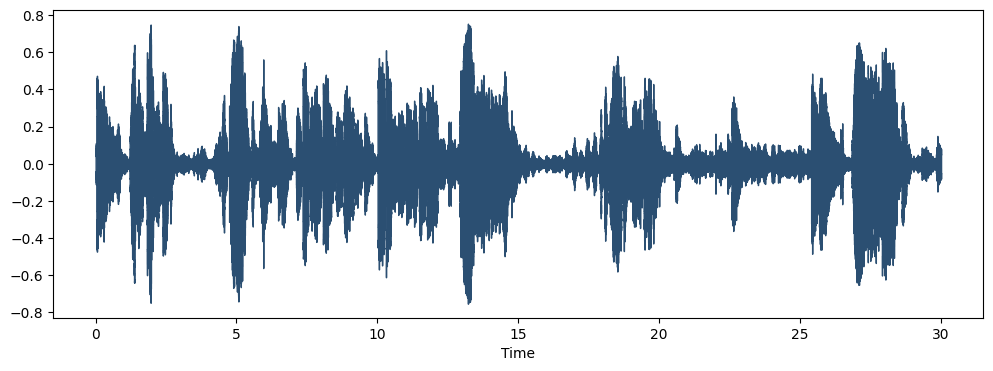

In [8]:
plt.figure(figsize=(12,4)) 
librosa.display.waveshow(data,color="#2B4F72") 
plt.show() 

C:\Users\shree\AppData\Local\Temp\ipykernel_13464\2666027721.py:4: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft,sr=sr,x_axis='time',y_axis='hz')


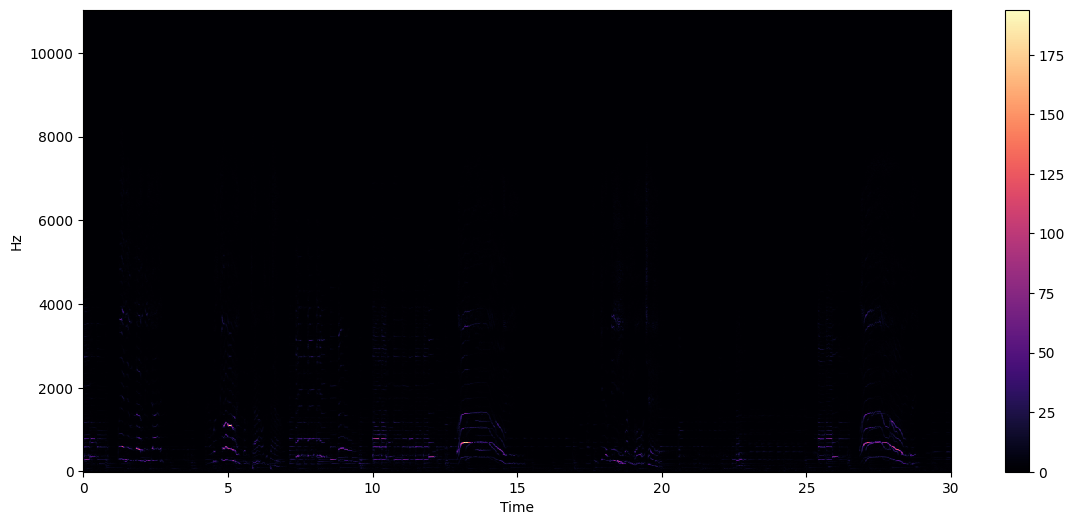

In [9]:
stft=librosa.stft(data) 
stft_db=librosa.amplitude_to_db(abs(stft)) 
plt.figure(figsize=(14,6)) 
librosa.display.specshow(stft,sr=sr,x_axis='time',y_axis='hz') 
plt.colorbar() 

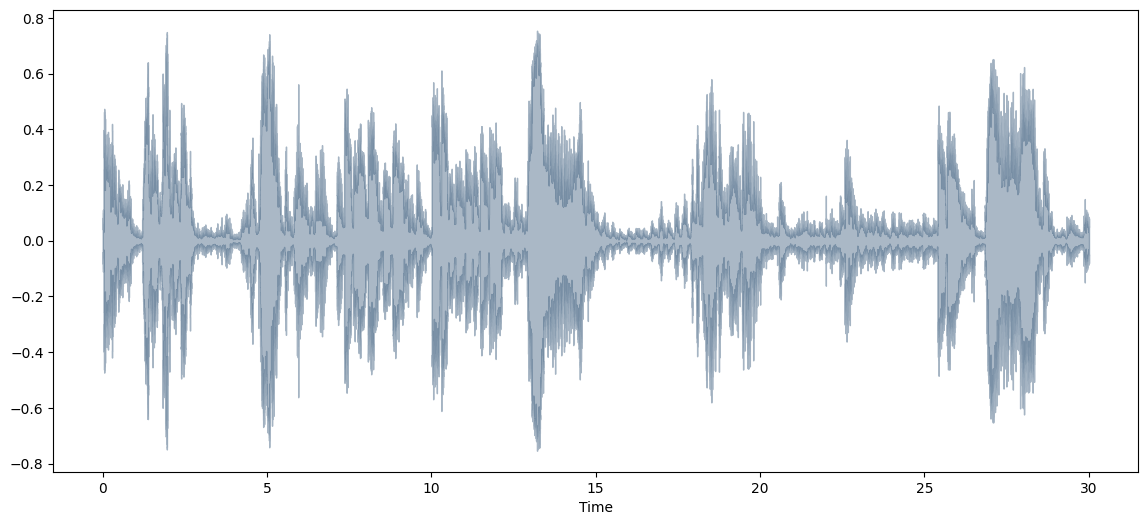

In [10]:
from sklearn.preprocessing import normalize 
rolloff=librosa.feature.spectral_rolloff(y=data+0.01,sr=sr)[0] 
plt.figure(figsize=(14,6)) 
librosa.display.waveshow(data,sr=sr,alpha=0.4,color="#2B4F72")

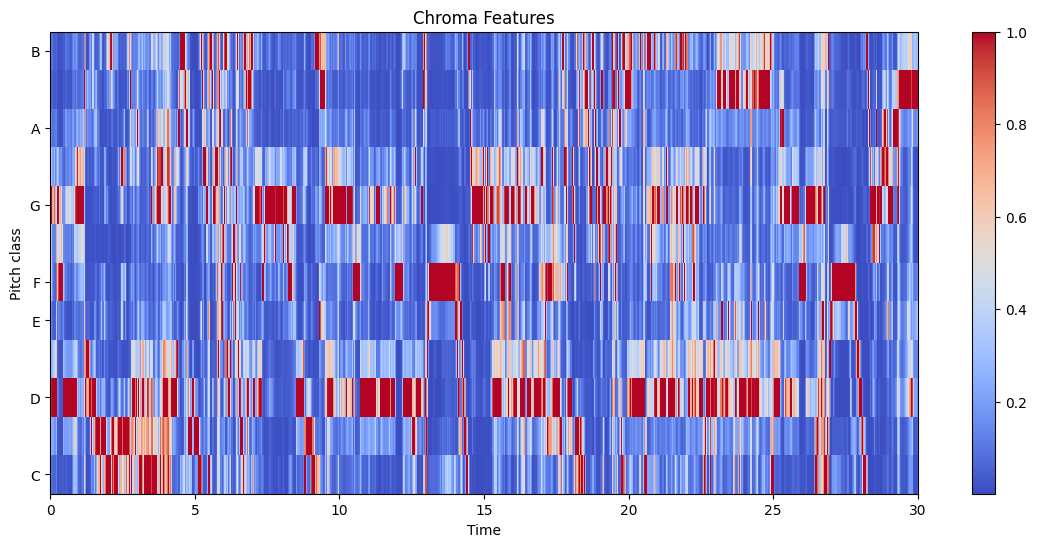

In [11]:
import librosa.display as lplt 
chroma = librosa.feature.chroma_stft(y=data,sr=sr) 
plt.figure(figsize=(14,6)) 
lplt.specshow(chroma,sr=sr,x_axis="time",y_axis="chroma",cmap="coolwarm") 
plt.colorbar() 
plt.title("Chroma Features") 
plt.show() 

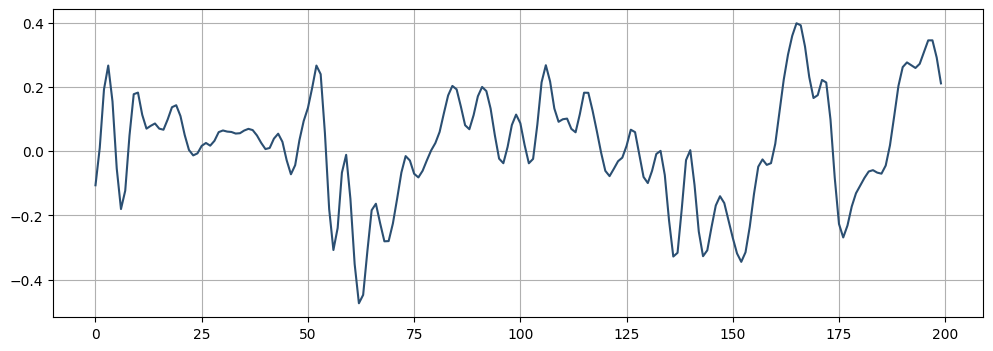

In [12]:
start=1000 
end=1200 
plt.figure(figsize=(12,4)) 
plt.plot(data[start:end],color="#2B4F72") 
plt.grid()

In [13]:
zero_cross_rate=librosa.zero_crossings(data[start:end],pad=False) 
print("the numbert of zero_crossings is :", sum(zero_cross_rate)) 

the numbert of zero_crossings is : 23


In [16]:
class_list=f.iloc[:,-1] 
converter=LabelEncoder() 
y=converter.fit_transform(class_list) 
y 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [18]:
print(f.iloc[:,:-1]) 

            filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0    blues.00000.wav  661794          0.350088         0.088757  0.130228   
1    blues.00001.wav  661794          0.340914         0.094980  0.095948   
2    blues.00002.wav  661794          0.363637         0.085275  0.175570   
3    blues.00003.wav  661794          0.404785         0.093999  0.141093   
4    blues.00004.wav  661794          0.308526         0.087841  0.091529   
..               ...     ...               ...              ...       ...   
995   rock.00095.wav  661794          0.352063         0.080487  0.079486   
996   rock.00096.wav  661794          0.398687         0.075086  0.076458   
997   rock.00097.wav  661794          0.432142         0.075268  0.081651   
998   rock.00098.wav  661794          0.362485         0.091506  0.083860   
999   rock.00099.wav  661794          0.358401         0.085884  0.054454   

      rms_var  spectral_centroid_mean  spectral_centroid_var  \
0    0.0028

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
f = pd.read_csv("D:\\c_dwnlds\\archive\\Data\\features_30_sec.csv")

# Exclude non-numeric columns (assuming the last column is the class label)
X_features = f.select_dtypes(include=[np.number])

# Standardize the numeric features
scaler = StandardScaler()
X = scaler.fit_transform(X_features)

# Display the transformed features
print(X.shape)  # Check the shape of the transformed dataset


(1000, 58)


In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35)

In [23]:
len(y_test) 
len(y_train) 

650

In [26]:
from tensorflow.keras.models import Sequential

def trainModel(model, X_train, y_train, X_test, y_test, epochs, optimizer):
    batch_size = 128  # Correct indentation

    # Compile the model
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

    return history  # Return the training history if needed


In [27]:
def plotValidate(history): 
    print("Validation Accuracy",max(history.history["val_accuracy"])) 
    pd.DataFrame(history.history).plot(figsize=(12,6)) 
    plt.show() 

In [28]:
import tensorflow as tf 
model=tf.keras.models.Sequential([ 
    tf.keras.layers.Dense(512,activation='relu',input_shape=(X_train.shape[1],)), 
    tf.keras.layers.Dropout(0.2), 
     
    tf.keras.layers.Dense(256,activation='relu'), 
    keras.layers.Dropout(0.2), 
     
    tf.keras.layers.Dense(128,activation='relu'), 
    tf.keras.layers.Dropout(0.2), 
     
    tf.keras.layers.Dense(64,activation='relu'), 
    tf.keras.layers.Dropout(0.2), 
     
    tf.keras.layers.Dense(10,activation='softmax'), 
]) 

c:\Users\shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
print(model.summary()) 
model_history = trainModel(model=model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, epochs=600, optimizer='adam') 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        30,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,338 (794.29 KB)

 Trainable params: 203,338 (794.29 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.1578 - loss: 2.2794 - val_accuracy: 0.4000 - val_loss: 1.9427
Epoch 2/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3480 - loss: 1.9551 - val_accuracy: 0.4314 - val_loss: 1.6716
Epoch 3/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3974 - loss: 1.7388 - val_accuracy: 0.4543 - val_loss: 1.4735
Epoch 4/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4469 - loss: 1.5813 - val_accuracy: 0.5286 - val_loss: 1.3286
Epoch 5/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4754 - loss: 1.4466 - val_accuracy: 0.5371 - val_loss: 1.2296
Epoch 6/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5059 - loss: 1.3788 - val_accuracy: 0.6257 - val_loss: 1.1146
Epoch 7/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5295 - loss: 1.3203 - val_accuracy: 0.6114 - val_loss: 1.0679
Epoch 8/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6006 - loss: 1.2019 - val_accuracy: 0.6229 - val_

In [32]:
test_loss,test_acc=model.evaluate(X_test,y_test,batch_size=128) 
print("The test loss is ",test_loss) 
print("The best accuracy is: ",test_acc*100)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7735 - loss: 1.8038 
The test loss is  1.8984404802322388
The best accuracy is:  76.57142877578735


In [33]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score,f1_score 
DT_classifier = DecisionTreeClassifier() 
DT_classifier.fit(X_train , y_train) 
DT_classifier.score(X_test , y_test) 
y_pred = DT_classifier.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred) 
print(f'Accuracy: {accuracy:.2f}') 
f1 = f1_score(y_test, y_pred, average='weighted') 
print(f'F1 Score: {f1:.2f}') 

Accuracy: 0.59
F1 Score: 0.58


Text(95.72222222222221, 0.5, 'Truth')

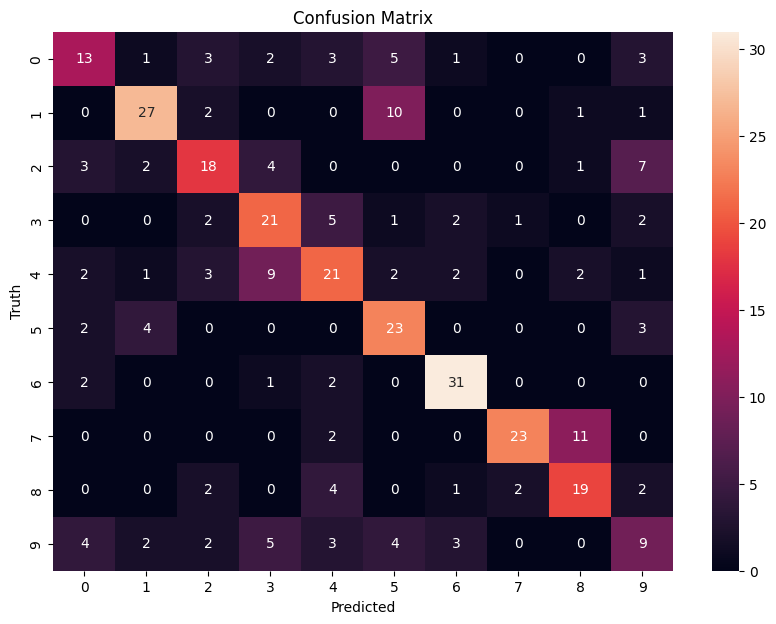

In [34]:
from sklearn.metrics import confusion_matrix 
DT_cm = confusion_matrix(y_test, y_pred) 
import seaborn as sn 
plt.figure(figsize=(10,7)) 
sn.heatmap(DT_cm, annot=True) 
plt.title('Confusion Matrix') 
plt.xlabel('Predicted') 
plt.ylabel('Truth') 

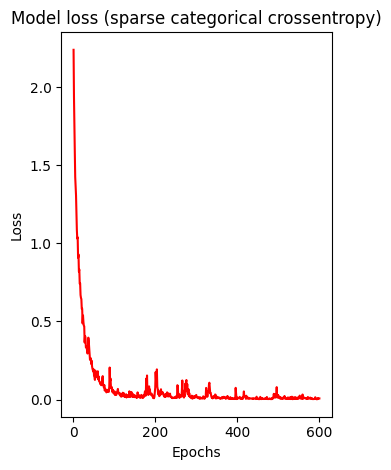

In [35]:
epochs = np.arange(1,601) 
plt.figure() 
plt.subplot(1,2,1) 
plt.plot(epochs, model_history.history['loss'], color='r') 
plt.title('Model loss (sparse categorical crossentropy)') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.tight_layout()

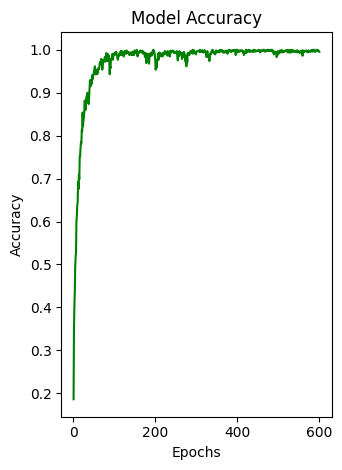

In [36]:
plt.subplot(1,2,2) 
plt.plot(epochs,model_history.history['accuracy'], color='g') 
plt.title('Model Accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.tight_layout() 
plt.show() 